In [1]:
from evo.tools import file_interface

# Convert timestamps from nanoseconds to seconds
def process_trajectory(input_file, output_file):
    traj = file_interface.read_tum_trajectory_file(input_file)
    traj.timestamps = traj.timestamps / 1e9
    file_interface.write_tum_trajectory_file(output_file, traj)

process_trajectory("f_pySLAM_EuRoC_TUM_Trajectory.tum", "pySLAM.tum")
process_trajectory("f_ORBSLAM3_EuRoC_TUM_Trajectory.tum", "ORBSLAM3.tum")

# Umeyama Algorithm

The Umeyama Algorithm is a technique used for aligning two sets of point data in three-dimensional space. It is particularly useful in fields such as computer graphics, image processing, and 3D graphics.

The Umeyama Algorithm is named after Takeo Umeyama, a Japanese researcher in computer graphics. This algorithm extends the Principal Component Analysis (PCA) method, which is used for dimensionality reduction.

The Umeyama Algorithm consists of the following steps:

1. **Data Centering:** Both sets of point data are first shifted so that their means are close to zero. This step helps to normalize the data and remove any translation differences between the sets.

2. **Covariance Matrix Estimation:** Then, the covariance matrix of both data sets is computed. The covariance matrix provides information about the relationship between the variables in the data and is essential for understanding the distribution of the data.

3. **Transformation Matrix Calculation:** Based on the covariance matrix, an optimal transformation matrix is calculated that minimizes the distance between the data sets. This transformation matrix typically includes a rotation, translation, and possibly a scaling component. The least squares method is used to estimate the parameters of this transformation matrix.
   
4. **Applying the Transformation:** Finally, the determined transformation matrix is applied to one of the data sets to align it with the other set of data. This transformation effectively maps one set of points onto the other, ensuring that corresponding points are as close together as possible in three-dimensional space.

The least squares solution parameters of an Sim(m)Sim(m) matrix that minimizes the distance between a set of registered points can be computed using the Umeyama Algorithm. This involves calculating the rotation matrix RR, translation vector tt, and possibly a scaling factor cc. These parameters are obtained by minimizing the distance between the points in the two sets.

Umeyama Algorithm

Let $ X = \{ x_1, x_2, ..., x_n \} $ and $ Y = \{ y_1, y_2, ..., y_n \} $ be sets of points in three-dimensional space.

The transformation matrix T that aligns set X with set Y can be computed as follows:
\begin{equation*}
T = argmin_{R, t} \sum_{i=1}^{n} \| R x_i + t - y_i \|
\end{equation*}
subject to:  \begin{equation*}RR^T=I \end{equation*}

The optimal rotation matrix R and translation vector t can be obtained using least squares estimation.The optimal rotation matrix R and translation vector t can be obtained using least squares estimation.

In [2]:
from evo.core import sync
from evo.tools import file_interface
import copy

# Read TUM format trajectory
def read_trajectory(filename):
    return file_interface.read_tum_trajectory_file(filename)
    
# Alignment of Two 3D Trajectories through matching timestamps
def align_trajectories(gt_traj, est_traj, max_diff):
    gt_traj_aligned, est_traj_aligned = sync.associate_trajectories(gt_traj, est_traj, max_diff)
    return gt_traj_aligned, est_traj_aligned

# Alignment with Umeyama algorithm
def align_trajectory_with_gt(est_traj, gt_traj):
    est_traj_aligned = copy.deepcopy(est_traj)
    est_traj_aligned.align(gt_traj, correct_scale=True, correct_only_scale=False)
    return est_traj_aligned

max_diff = 0.01

traj_gt = read_trajectory("MH01_GT.tum")

traj_pyslam = read_trajectory("pySLAM.tum")
traj_orb = read_trajectory("ORBSLAM3.tum")

traj_orb_gt, traj_orb = align_trajectories(traj_gt, traj_orb, max_diff)
traj_pyslam_gt, traj_pyslam = align_trajectories(traj_gt, traj_pyslam, max_diff)

traj_orb_aligned = align_trajectory_with_gt(traj_orb, traj_gt)
traj_pyslam_aligned = align_trajectory_with_gt(traj_pyslam, traj_gt)


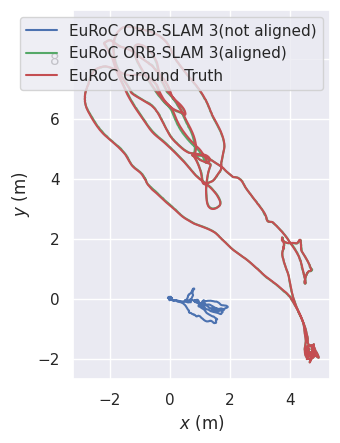

In [3]:
import matplotlib.pyplot as plt
from evo.tools import plot
from evo.tools.plot import PlotMode

# Plot the trajectories:
%matplotlib inline

fig_1 = plt.figure()
traj_orb_by_label = {
    "EuRoC ORB-SLAM 3(not aligned)": traj_orb,
    "EuRoC ORB-SLAM 3(aligned)": traj_orb_aligned,
    "EuRoC Ground Truth": traj_gt
}
plot.trajectories(fig_1, traj_orb_by_label, plot.PlotMode.xy)

plt.show()

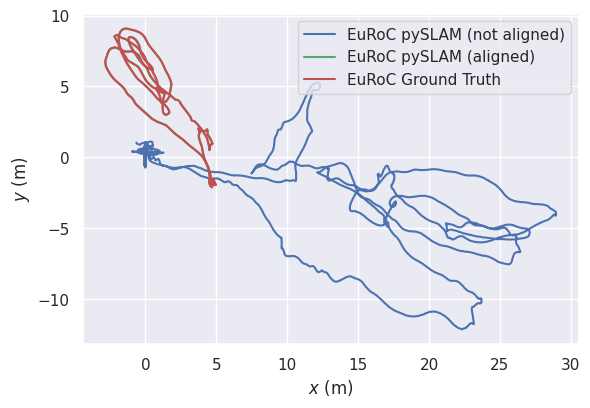

In [4]:
fig_2 = plt.figure()
traj_pyslam_by_label = {
    "EuRoC pySLAM (not aligned)": traj_pyslam,
    "EuRoC pySLAM (aligned)": traj_pyslam_aligned,
    "EuRoC Ground Truth": traj_gt
}
plot.trajectories(fig_2, traj_pyslam_by_label, plot.PlotMode.xy)

plt.show()

In [5]:
from evo.core.units import Unit
from evo.tools.settings import SETTINGS

length_unit = Unit(SETTINGS.plot_trajectory_length_unit)

def plot_trajectory(traj_gt, traj, label_gt, label_traj, color=None, start_time=None):

    fig_traj, ax_traj = plt.subplots(figsize=tuple(SETTINGS.plot_figsize))
    plot.traj(ax_traj, plot.PlotMode.xy, traj_gt, style=SETTINGS.plot_reference_linestyle,
              color=SETTINGS.plot_reference_color, label=label_gt,
              alpha=SETTINGS.plot_reference_alpha)

    plot.traj(ax_traj, plot.PlotMode.xy, traj, style=SETTINGS.plot_trajectory_linestyle,
              color=color, label=label_traj,
              alpha=SETTINGS.plot_trajectory_alpha)

def plot_trajectory_xyz(traj_gt, traj, label_gt, label_traj, color=None, start_time=None):
    fig_xyz, axarr_xyz = plt.subplots(3, sharex="col", figsize=tuple(SETTINGS.plot_figsize))
    plot.traj_xyz(axarr_xyz, traj_gt,
              style=SETTINGS.plot_reference_linestyle,
              color=SETTINGS.plot_reference_color,
              label=label_gt,
              alpha=SETTINGS.plot_reference_alpha,
              start_timestamp=start_time, length_unit=length_unit)

    plot.traj_xyz(axarr_xyz, traj, SETTINGS.plot_trajectory_linestyle,
                  color, label=label_traj,
                  alpha=SETTINGS.plot_trajectory_alpha,
                  start_timestamp=start_time, length_unit=length_unit)

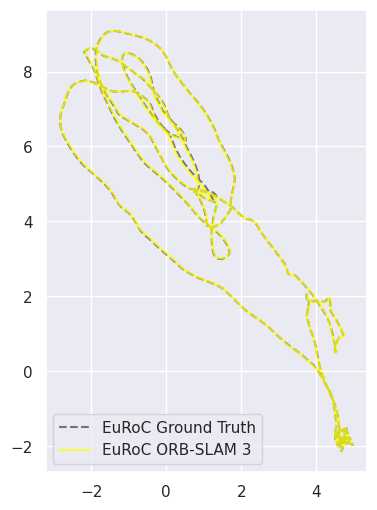

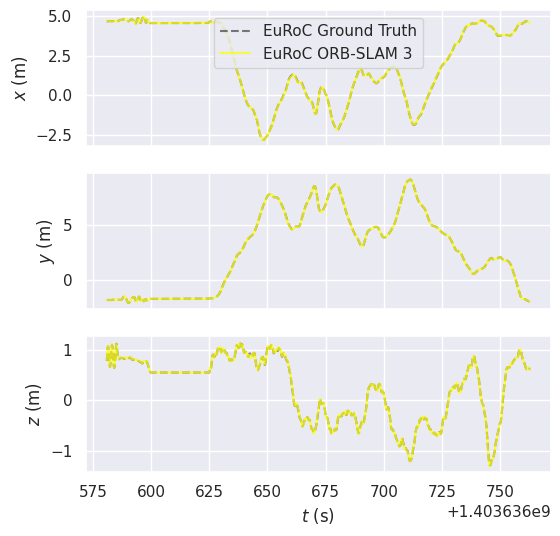

In [6]:
plot_trajectory(traj_gt, traj_orb_aligned, "EuRoC Ground Truth", "EuRoC ORB-SLAM 3", 'yellow')
plot_trajectory_xyz(traj_gt, traj_orb_aligned, "EuRoC Ground Truth", "EuRoC ORB-SLAM 3", 'yellow')

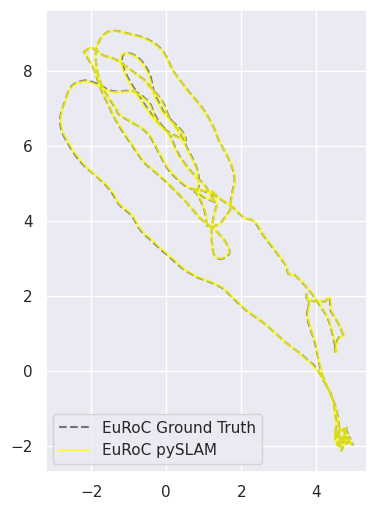

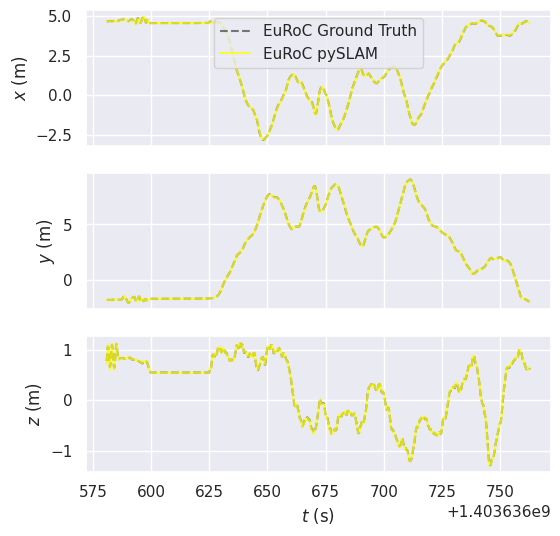

In [7]:
plot_trajectory(traj_gt, traj_pyslam_aligned, "EuRoC Ground Truth", "EuRoC pySLAM", 'yellow')
plot_trajectory_xyz(traj_gt, traj_pyslam_aligned, "EuRoC Ground Truth", "EuRoC pySLAM", 'yellow')

<a id='ape_math'></a>
## APE

The absolute pose error (APE) serves as a metric for evaluating the global consistency of a Simultaneous Localization and Mapping (SLAM) trajectory. In SLAM, a system typically estimates the poses (positions and orientations) of a robot or sensor platform over time while simultaneously constructing a map of its environment.

APE quantifies the disparity between the estimated poses provided by the SLAM system and the ground truth poses. It helps assess how accurately the estimated trajectory aligns with the actual trajectory. A low APE indicates that the estimated poses closely match the ground truth, suggesting good global consistency in the SLAM solution. Conversely, a high APE implies significant discrepancies between the estimated and ground truth poses, indicating poor global consistency and potential errors in the SLAM solution.

APE is calculated based on the absolute relative pose between two poses $P_{ref,i}, P_{est,i} \in \mathrm{SE}(3)$ at timestamp $i$:
\begin{equation*}
E_i = P_{est,i} \ominus P_{ref,i} = P_{est,i}^{-1} P_{ref,i} \in \mathrm{SE}(3)
\end{equation*}
where $\ominus$ is the inverse compositional operator, which takes two poses and gives the relative pose [Lu-1997].
You can use different pose relations to calculate the APE:
* **`metrics.PoseRelation.translation_part`**
    * this uses the translation part of $E_i$
    * $ APE_i = \| \mathrm{trans}(E_i) \| $
    * since this is the distance measured in the shared inertial frame, it is equal to `metrics.PoseRelation.point_distance`
* **`metrics.PoseRelation.rotation_angle_(rad/deg)`**
    * uses the rotation angle of $E_i$
    * $ APE_i = |( \mathrm{angle}(\log_{\mathrm{SO}(3)}(\mathrm{rot}(E_i)) )| $
    * $ \log_{\mathrm{SO}(3)}(\cdot) $ is the inverse of $ \exp_{\mathfrak{so}(3)}(\cdot) $ (Rodrigues' formula)
* **`metrics.PoseRelation.rotation_part`**
    * this uses the rotation part of $E_i$
    * $ APE_i = \| \mathrm{rot}(E_i) - I_{3 \times 3} \|_F $
    * unit-less
* **`metrics.PoseRelation.full_transformation`**
    * this uses the full relative pose $E_i$
    * $ APE_i = \| E_i - I_{4 \times 4} \|_F $
    * unit-less
    
Then, different statistics can be calculated on the APEs of all timestamps, e.g. the RMSE:
\begin{equation*}
\mathrm{RMSE} = \sqrt{ \frac{1}{N} \sum_{i=1}^N APE_i^2 } 
\end{equation*}

In [8]:
from evo.core import metrics

pose_relation = metrics.PoseRelation.translation_part
use_aligned_trajectories = True
if use_aligned_trajectories:
    orb_data = (traj_gt, traj_orb_aligned)
    pyslam_data = (traj_gt, traj_pyslam_aligned) 
else:
    orb_data = (traj_gt, traj_orb)
    pyslam_data = (traj_gt, traj_pyslam) 
ape_metric = metrics.APE(pose_relation)

In [9]:
def process_and_get_stats(data, metric):
    metric.process_data(data)
    stats_all = metric.get_all_statistics()
    return stats_all

# Process ORB data
ape_stats_all_orb = process_and_get_stats(orb_data, ape_metric)

# Process pySLAM data
ape_stats_all_pyslam = process_and_get_stats(pyslam_data, ape_metric)


In [10]:
from prettytable import PrettyTable

def print_ape_stats(ape_stats, label):
    max_len = max(len(label), 10) 
    label_formatted = f"{label:<{max_len}} "
    
    table = PrettyTable()
    table.field_names = ["Statistic", "Value"]
    table.align["Statistic"] = "l"
    table.align["Value"] = "r"

    table.add_row(["Max", ape_stats['max']])
    table.add_row(["Mean", ape_stats['mean']])
    table.add_row(["Median", ape_stats['median']])
    table.add_row(["Min", ape_stats['min']])
    table.add_row(["RMSE", ape_stats['rmse']])
    table.add_row(["SSE", ape_stats['sse']])
    table.add_row(["Standard Deviation", ape_stats['std']])

    print(label_formatted)
    print(table)


print_ape_stats(ape_stats_all_orb, 'ORB-SLAM 3')
print_ape_stats(ape_stats_all_pyslam, 'pySLAM')

ORB-SLAM 3 
+--------------------+-----------------------+
| Statistic          |                 Value |
+--------------------+-----------------------+
| Max                |   0.06248715983899899 |
| Mean               |  0.013999814037573147 |
| Median             |  0.011679430142753869 |
| Min                | 0.0011414921930928308 |
| RMSE               |  0.017735674535891737 |
| SSE                |      1.14434800222232 |
| Standard Deviation |  0.010888496597623034 |
+--------------------+-----------------------+
pySLAM     
+--------------------+-----------------------+
| Statistic          |                 Value |
+--------------------+-----------------------+
| Max                |   0.05146793237778401 |
| Mean               |  0.014884093530309197 |
| Median             |  0.014198037768173159 |
| Min                | 0.0017294293897370755 |
| RMSE               |  0.016854796089480317 |
| SSE                |    1.0334981421309422 |
| Standard Deviation |  0.0079087237

In [11]:
def plot_ape_values_and_statistics(traj, stats, label):
    seconds_from_start = [t - traj.timestamps[0] for t in traj.timestamps]
    fig = plt.figure()
    plot.error_array(fig.gca(), ape_metric.error, x_array=seconds_from_start,
                     statistics={s:v for s,v in stats.items() if s != "sse"},
                     name=f"{label} APE", title=f"APE w.r.t. " + ape_metric.pose_relation.value, xlabel="$t$ (s)")
    plt.show()

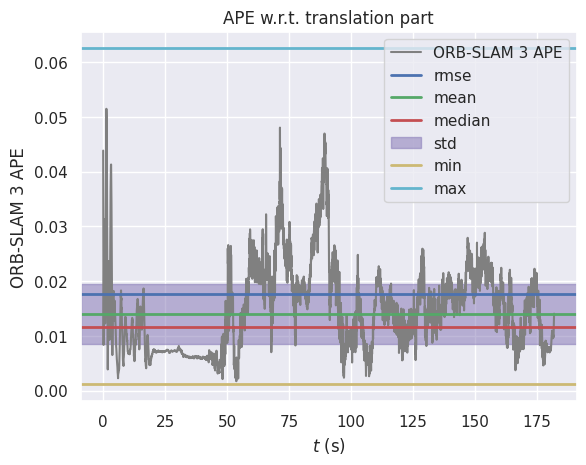

In [12]:
plot_ape_values_and_statistics(traj_orb, ape_stats_all_orb, "ORB-SLAM 3")

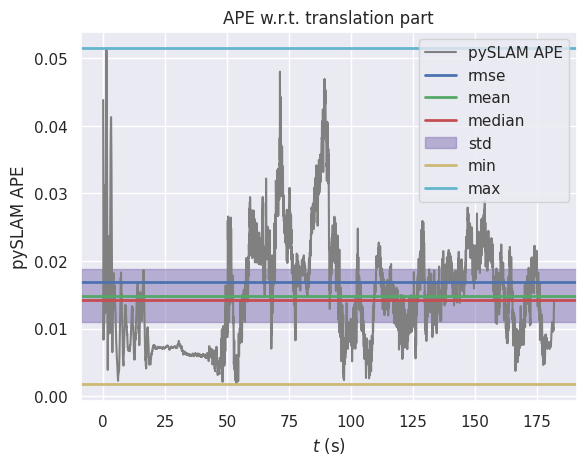

In [13]:
plot_ape_values_and_statistics(traj_pyslam, ape_stats_all_pyslam, "pySLAM")

In [14]:
def plot_ape_trajectory_with_colormapping(traj_aligned, traj_ref, stats):
    plot_mode = plot.PlotMode.xy
    fig = plt.figure()
    ax = plot.prepare_axis(fig, plot_mode)
    plot.traj(ax, plot_mode, traj_ref, '--', "gray", traj_ref)
    plot.traj_colormap(ax, traj_aligned, ape_metric.error, 
                       plot_mode, min_map=stats["min"], max_map=stats["max"])
    ax.legend()
    plt.show()

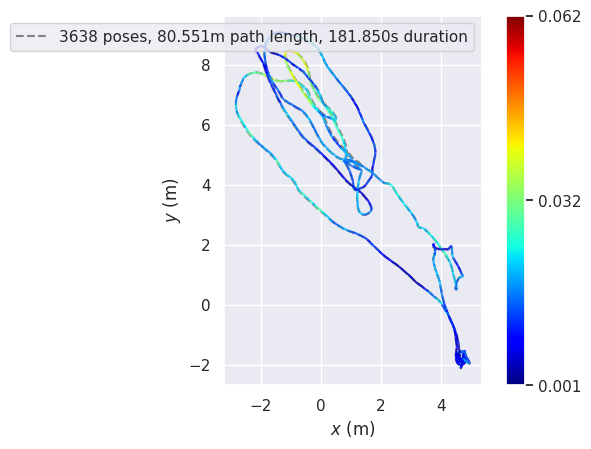

In [15]:
plot_ape_trajectory_with_colormapping(traj_orb_aligned, traj_gt, ape_stats_all_orb)

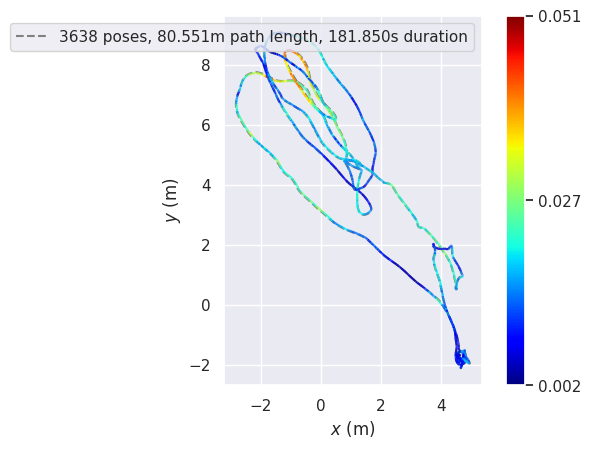

In [16]:
plot_ape_trajectory_with_colormapping(traj_pyslam_aligned, traj_gt, ape_stats_all_pyslam)

<a id='rpe_math'></a>
# RPE

The Relative Pose Error (RPE) is a widely used metric for assessing the local consistency of a Simultaneous Localization and Mapping (SLAM) trajectory. By analyzing the Relative Pose Error, researchers and engineers can gain detailed insights into the performance of SLAM systems, enabling the development of more robust and accurate localization and mapping solutions.

RPE compares the relative transformations between successive poses in the estimated trajectory against the corresponding transformations in the ground truth trajectory. This is based on the delta pose difference: 
\begin{equation*} E_{i,j} = \delta_{est_{i,j}} \ominus \delta_{ref_{i,j}} = (P_{ref,i}^{-1}P_{ref,j})^{-1} (P_{est,i}^{-1}P_{est,j}) \in \mathrm{SE}(3) \end{equation*}

You can use different pose relations to calculate the RPE from timestamp $i$ to $j$:
* **`metrics.PoseRelation.translation_part`**
    * this uses the translation part of $E_{i,j}$
    * $ RPE_{i,j} = \| \mathrm{trans}(E_{i,j}) \| $
* **`metrics.PoseRelation.rotation_angle_(rad/deg)`**
    * uses the absolute angular error of $E_{i,j}$
    * $ RPE_{i,j} = |( \mathrm{angle}(\log_{\mathrm{SO}(3)}(\mathrm{rot}(E_{i,j})) )| $
    * $ \log_{\mathrm{SO}(3)}(\cdot) $ is the inverse of $ \exp_{\mathfrak{so}(3)}(\cdot) $ (Rodrigues' formula)
* **`metrics.PoseRelation.rotation_part`**
    * this uses the rotation part of $E_{i,j}$
    * $ RPE_{i,j} = \| \mathrm{rot}(E_{i,j}) - I_{3 \times 3} \|_F $
    * unit-less
* **`metrics.PoseRelation.full_transformation`**
    * this uses the full delta pose difference $E_{i,j}$
    * $ RPE_{i,j} = \| E_{i,j} - I_{4 \times 4} \|_F $
    * unit-less
    
Then, different statistics can be calculated on the RPEs of all timestamps, e.g. the RMSE:
\begin{equation*}
\mathrm{RMSE} = \sqrt{ \frac{1}{N} \sum_{\forall ~i,j} RPE_{i,j}^2 } 
\end{equation*}

---

A special case is **`metrics.PoseRelation.point_distance`**. This compares only the point distance between the pose pairs and is not based on $E_{i, j}$. In contrast to `translation_part` this doesn't compare translation vectors. This can be useful if the data has no orientation, e.g. GPS data.

In [17]:
pose_relation = metrics.PoseRelation.rotation_angle_deg

# normal mode
delta = 1
delta_unit = Unit.frames

# all pairs mode
all_pairs = False  # activate

In [18]:
rpe_metric = metrics.RPE(pose_relation=pose_relation, delta=delta, delta_unit=delta_unit, all_pairs=all_pairs)

In [19]:
def print_rpe_stats(ape_stats, label):
    max_len = max(len(label), 10) 
    label_formatted = f"{label:<{max_len}} "
    
    table = PrettyTable()
    table.field_names = ["Statistic", "Value"]
    table.align["Statistic"] = "l"
    table.align["Value"] = "r"

    table.add_row(["Max", ape_stats['max']])
    table.add_row(["Mean", ape_stats['mean']])
    table.add_row(["Median", ape_stats['median']])
    table.add_row(["Min", ape_stats['min']])
    table.add_row(["RMSE", ape_stats['rmse']])
    table.add_row(["SSE", ape_stats['sse']])
    table.add_row(["Standard Deviation", ape_stats['std']])

    print(label_formatted)
    print(table)


In [20]:
rpe_metric.process_data(orb_data)
rpe_stats_all_orb = rpe_metric.get_all_statistics()
print_rpe_stats(rpe_stats_all_orb, "ORB-SLAM 3")

ORB-SLAM 3 
+--------------------+-----------------------+
| Statistic          |                 Value |
+--------------------+-----------------------+
| Max                |    3.6996673746311135 |
| Mean               |    0.7014058971509358 |
| Median             |    0.5574056082431463 |
| Min                | 0.0029073101493156555 |
| RMSE               |    0.9224066575940427 |
| SSE                |    3094.4834106587596 |
| Standard Deviation |    0.5990524262664364 |
+--------------------+-----------------------+


In [21]:
rpe_metric.process_data(pyslam_data)
rpe_stats_all_pyslam = rpe_metric.get_all_statistics()
print_rpe_stats(rpe_stats_all_pyslam, "pySLAM")

pySLAM     
+--------------------+-----------------------+
| Statistic          |                 Value |
+--------------------+-----------------------+
| Max                |    3.7588157171838685 |
| Mean               |    0.6952075747010922 |
| Median             |    0.5561091828000057 |
| Min                | 0.0017390560806881397 |
| RMSE               |    0.9175150003755572 |
| SSE                |    3061.7494429997955 |
| Standard Deviation |    0.5987655668058944 |
+--------------------+-----------------------+


In [24]:
def plot_rpe(traj, traj_gt, rpe_stats, label):
    seconds_from_start = [t - traj.timestamps[0] for t in traj.timestamps[1:]]
    fig = plt.figure()
    plot.error_array(fig.gca(), rpe_metric.error, x_array=seconds_from_start,
                     statistics={s:v for s,v in rpe_stats.items() if s != "sse"},
                     name=f"{label} RPE", title="RPE w.r.t. " + rpe_metric.pose_relation.value, xlabel="$t$ (s)")
    plt.show()

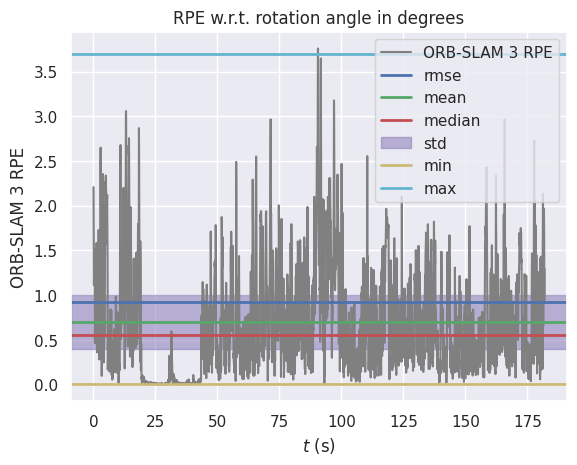

In [25]:
plot_rpe(traj_orb, traj_gt, rpe_stats_all_orb, "ORB-SLAM 3")

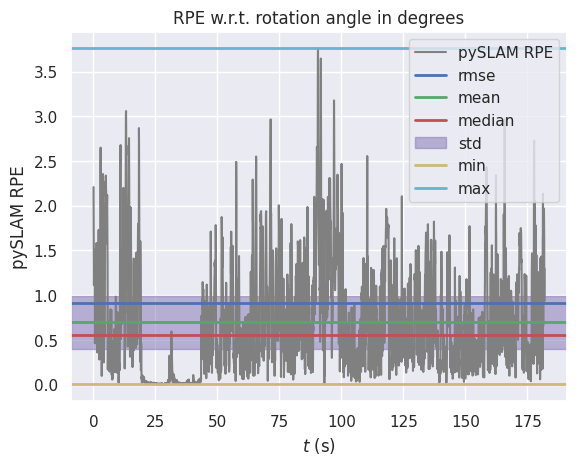

In [26]:
plot_rpe(traj_pyslam, traj_gt, rpe_stats_all_pyslam, "pySLAM")

In [27]:
def plot_rpe_with_colormapping(traj_plot, traj_gt_plot, rpe_stats):
    plot_mode = plot.PlotMode.xy
    fig = plt.figure()
    ax = plot.prepare_axis(fig, plot_mode)
    plot.traj(ax, plot_mode, traj_gt_plot, '--', "gray", "reference")
    plot.traj_colormap(ax, traj_plot, rpe_metric.error, plot_mode, min_map=rpe_stats["min"], max_map=rpe_stats["max"])
    ax.legend()
    plt.show()

In [28]:
traj_gt_plot = copy.deepcopy(traj_gt)
traj_gt_plot.reduce_to_ids(rpe_metric.delta_ids)
traj_orb_plot = copy.deepcopy(traj_orb_aligned)
traj_orb_plot.reduce_to_ids(rpe_metric.delta_ids)
traj_pyslam_plot = copy.deepcopy(traj_pyslam_aligned)
traj_pyslam_plot.reduce_to_ids(rpe_metric.delta_ids)

NameError: name 'rpe_stats' is not defined

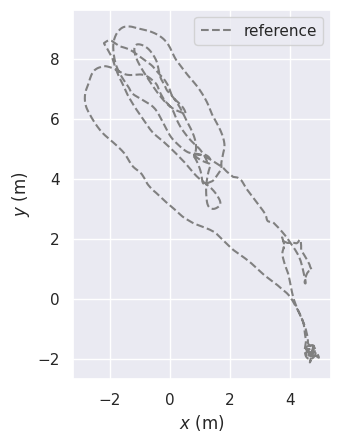

In [29]:
plot_rpe_with_colormapping(traj_orb_plot, traj_gt_plot, rpe_stats_all_orb)

NameError: name 'rpe_stats' is not defined

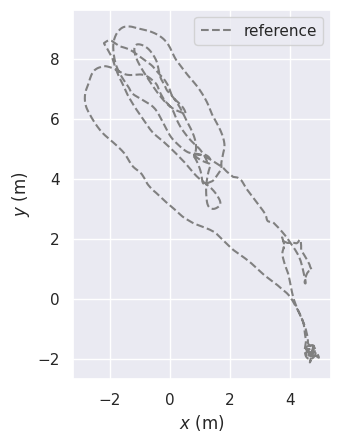

In [30]:
plot_rpe_with_colormapping(traj_pyslam_plot, traj_gt_plot, rpe_r)